## Testing BARTTSAgent with a Simulation

In this notebook we define a simple scenario (LinearScenario) and a simulation function. The simulation runs a loop over several rounds (draws) in which, at each round, the scenario generates covariates and rewards. Each agent (here a BARTTSAgent) selects an arm based on its current state, the cumulative regret is updated, and the agent’s state is updated with the observed reward.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bart_playground.bandit.bart_agent import LogisticBARTAgent
from bart_playground.bandit.sim_util import *

from bart_playground.bandit.TEagents import TEAgent

### Running the Simulation
 
In this example, we set up a scenario with a given number of arms and features, create a BARTTSAgent (or BCFAgent), run the simulation for a fixed number of draws, and then plot the cumulative regret over time.

In [2]:
# Simulation parameters
n_draws = 300

scenario = OpenMLScenario(random_generator=0)

agent = LogisticBARTAgent(n_arms=scenario.K, n_features=scenario.P, nskip=20, ndpost=20,nadd=1,
                          n_trees=50, encoding='one-hot')
agent0 = TEAgent(n_arms=scenario.K, n_features=scenario.P, agent_type='xgboost')
agent1 = TEAgent(n_arms=scenario.K, n_features=scenario.P, agent_type='random_forest')
agents = [agent, agent0, agent1]
agent_names = ['LogisticBART', 'XGBoostTS', 'RandomForest-TS']

Random Forest parameters - exploration_variance: 1.0 n_estimators: 100


In [3]:

# Run the simulation.
# Define a helper that calls simulate() once and stores the result.
def run_simulation():
    global simulation_result
    simulation_result = simulate(scenario, agents, n_draws=n_draws, agent_names=agent_names)
    return simulation_result

_ = run_simulation()

Simulating:   0%|          | 0/300 [00:00<?, ?it/s]

Fitting initial BART model with first 4 observation(s)...

Simulating:   1%|▏         | 4/300 [00:01<01:40,  2.95it/s]

 Done.


Simulating:   2%|▏         | 5/300 [00:01<01:49,  2.69it/s]INFO:root:t = 10 - re-trained model
INFO:root:t = 10 - re-trained model
Simulating:   3%|▎         | 9/300 [00:02<01:06,  4.40it/s]INFO:root:t = 11 - re-trained model
INFO:root:t = 11 - re-trained model
Simulating:   3%|▎         | 10/300 [00:02<01:19,  3.63it/s]INFO:root:t = 13 - re-trained model
INFO:root:t = 13 - re-trained model
Simulating:   4%|▍         | 12/300 [00:03<01:18,  3.67it/s]INFO:root:t = 14 - re-trained model
INFO:root:t = 14 - re-trained model
Simulating:   4%|▍         | 13/300 [00:03<01:31,  3.14it/s]INFO:root:t = 16 - re-trained model
INFO:root:t = 16 - re-trained model
Simulating:   5%|▌         | 15/300 [00:04<01:27,  3.25it/s]INFO:root:t = 18 - re-trained model
INFO:root:t = 18 - re-trained model
Simulating:   6%|▌         | 17/300 [00:05<01:25,  3.29it/s]INFO:root:t = 21 - re-trained model
INFO:root:t = 21 - re-trained model
Simulating:   7%|▋         | 20/300 [00:05<01:14,  3.74it/s]INFO:root:t = 23 -

In [4]:
# %prun -s cumtime -D profile_bandit.prof -q run_simulation()
# !gprof2dot -f pstats profile_bandit.prof -o profile_bandit.dot
# !dot -Tpng profile_bandit.dot -o profile_bandit.png

### Plotting the Results

We plot the cumulative regret over simulation draws.

In [5]:
cum_regrets, time_agent = simulation_result

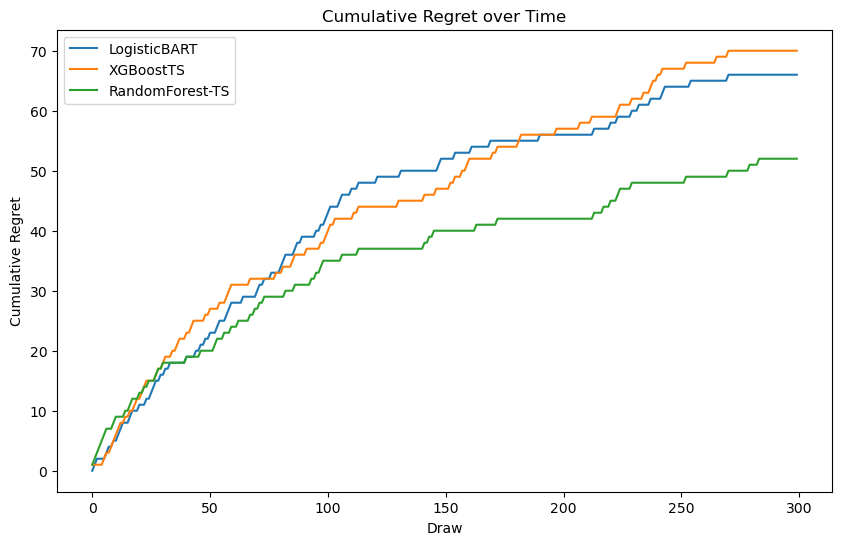

Agent computation times (seconds): [[5.86509705e-05 9.25064087e-05 5.93662262e-05]
 [3.14712524e-05 6.10351562e-05 5.29289246e-05]
 [5.26905060e-05 6.10351562e-05 6.46114349e-05]
 [1.35636592e+00 1.11103058e-04 6.46114349e-05]
 [4.59496498e-01 1.07765198e-04 5.10215759e-05]
 [1.33600235e-02 1.21831894e-04 5.05447388e-05]
 [1.22256279e-02 1.14917755e-04 4.91142273e-05]
 [1.28371716e-02 1.19209290e-04 5.10215759e-05]
 [1.23896599e-02 2.21006393e-01 2.52974510e-01]
 [1.29301548e-02 2.29378939e-01 2.56982327e-01]
 [1.24692917e-02 1.23107433e-02 1.29971504e-02]
 [1.24418736e-02 2.19405174e-01 2.64940977e-01]
 [1.23670101e-02 2.21860886e-01 2.72734404e-01]
 [1.26008987e-02 1.25272274e-02 1.33011341e-02]
 [1.16062164e-02 2.46180296e-01 2.83177853e-01]
 [1.19831562e-02 1.21941566e-02 1.30367279e-02]
 [1.19752884e-02 2.35758781e-01 3.03428411e-01]
 [1.25446320e-02 1.21397972e-02 1.29692554e-02]
 [1.20818615e-02 1.19667053e-02 1.29337311e-02]
 [1.26883984e-02 2.32658863e-01 3.28968048e-01]
 [1.2

In [6]:

plt.figure(figsize=(10, 6))
for i, agent in enumerate(agents):
    plt.plot(cum_regrets[:, i], label=agent_names[i])
plt.xlabel("Draw")
plt.ylabel("Cumulative Regret")
plt.title("Cumulative Regret over Time")
plt.legend()
plt.show()

print("Agent computation times (seconds):", time_agent)